In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
import copy

e = 1.602e-19     # Elementarladung [C]
d = 1e-3          # Probendicke [m]
l = 20e-3         # Probenlänge [m]
b = 10e-3         # Probenbreite [m]
A = d * b         # Querschnittsfläche [m²]

print(A)

1e-05


B = 151.360+/-1.002 [cm^3/As]
R_H = -8283.88+/-356.23 [cm^3/As]
n = (-7.54+/-0.32)e+14 [1/cm³]

R^2 = 0.9928


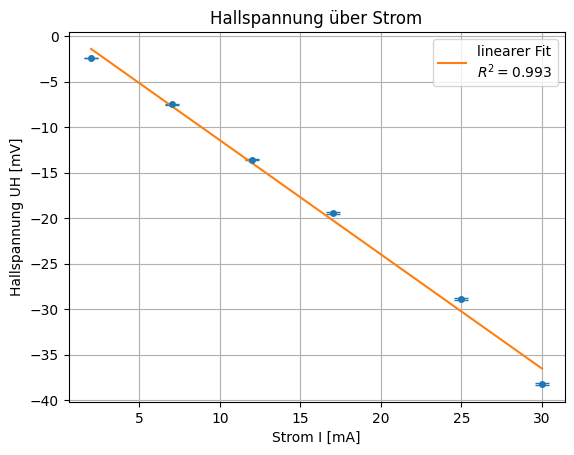

In [39]:
#Aufgabe 1 U_H(I) Plot n-Ge

I_B =  ufloat(3.108, 0.013)                                                 # Eingangsstrom von der Spule
Magnetfeld = ufloat(48.70, 0.25)*I_B                                    # Magnetfeld unter dem Strom I_B=3.1A
Stromstärke = np.array([0.002, 0.007, 0.012, 0.017, 0.025, 0.030])        # Der strom der druch die Probe fließt in A
Hall_Spannung = np.array([-2.4, -7.49, -13.58, -19.44, -28.89, -38.21])*1e-3 # spannung in mV 

Hallspannung_unsicherheit = abs((Hall_Spannung*1e3))*0.005+0.01

Hallspannung_unsicherheit[0] = abs(Hall_Spannung[0]) * 0.005 + 0.001
Hallspannung_unsicherheit[-2] = abs(Hall_Spannung[-2]) * 0.005 + 0.1                  #andere bereiche für unsicherheit
Hallspannung_unsicherheit[-1] = abs(Hall_Spannung[-1]) * 0.005 + 0.1

UH_B = unp.uarray(Hall_Spannung,Hallspannung_unsicherheit)
yerr_UH_B = unp.std_devs(UH_B)

# Fit berechnen
Gerade, intercept, r_value, p_value, stderr = linregress(Stromstärke, Hall_Spannung)
Gerade_unsich = ufloat(Gerade, stderr)

# Hall-konstante berechnen: RH = steigung * d / B
RH = (Gerade_unsich * d / Magnetfeld)*1e9
n = 1 / (e * RH)

print(f"B = {Magnetfeld:.3f} [cm^3/As]")
print(f"R_H = {RH:.2f} [cm^3/As]")
print(f"n = {n:.2e} [1/cm³]") 
print()
print(f"R^2 = {r_value**2:.4f}")
# Plot


plt.figure()
plt.errorbar(Stromstärke * 1e3, Hall_Spannung * 1e3, yerr = yerr_UH_B, markersize = 4, capsize = 5, fmt='o')

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value**2:.3f}$'

plt.plot(Stromstärke * 1e3, Gerade * Stromstärke * 1e3 + intercept * 1e3, label=label)
plt.xlabel("Strom I [mA]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hallspannung über Strom")
plt.legend()
plt.grid()
plt.show()

R_H = -7109.826+/-890.538 [cm^3/As]
n = (-8.780+/-1.100)e+20 [1/cm³]

R_H umgepolt = 7237.360+/-909.297 [cm^3/As]
n umgepolt = (8.625+/-1.084)e+20 [1/cm³]
R^2 = 0.9995


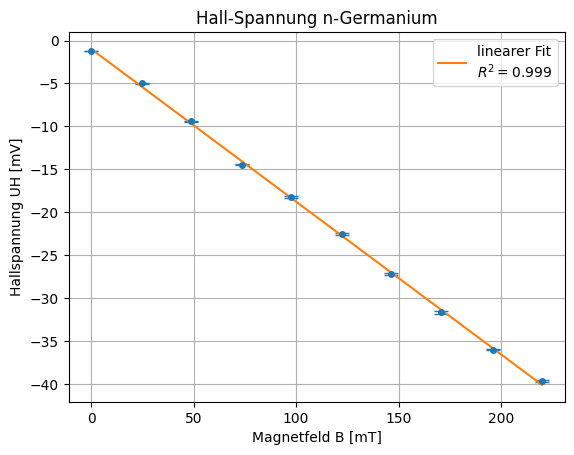

R^2 = 0.9987


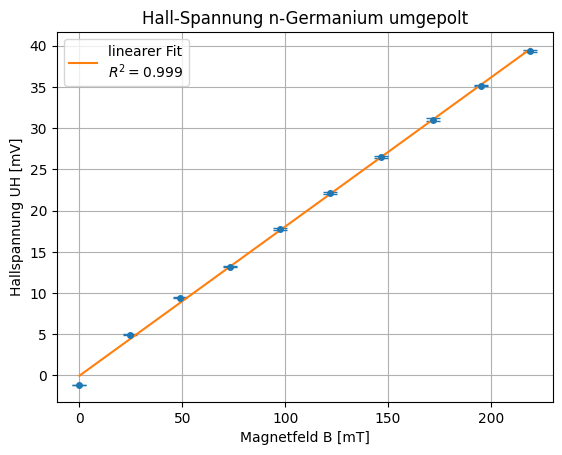

In [ ]:
#Aufgabe 2,3,4 U_H(B) normal und umgepolt plot

I_probe = ufloat(0.025,0.003125)                                                             # Probenstrom bleibt absofort gleich
I_B = np.array([0.00, 0.507, 1.002, 1.516, 2.0, 2.510, 3.001, 3.504, 4.024, 4.517])     #in A       # Magnetfeldstrom wird erhöht
I_B_umgepolt = np.array([0.0, 0.503, 1.00, 1.5, 2.005, 2.499, 3.008, 3.524, 4.011, 4.5]) #in A

Magnetfeld = 48.7e-3 * I_B                                                  # gegebene Eichung vom Feld
Magnetfeld_umgepolt = 48.7e-3 * I_B_umgepolt                               #bin mir beim umpolen nicht sicher, hab jetzt einfach ein minus davor gemacht

Hall_Spannung = np.array([-1.22, -4.98, -9.41, -14.46, -18.21, -22.55, -27.17, -31.63, -35.97, -39.64])*1e-3 #in V

Hallspannung_unsicherheit = abs((Hall_Spannung*1e3))*0.005+0.01

Hallspannung_unsicherheit[0] = abs(Hall_Spannung[0]) * 0.005 + 0.001
Hallspannung_unsicherheit[-2] = abs(Hall_Spannung[-2]) * 0.005 + 0.1                  #andere bereiche für unsicherheit
Hallspannung_unsicherheit[-1] = abs(Hall_Spannung[-1]) * 0.005 + 0.1

UH_B = unp.uarray(Hall_Spannung,Hallspannung_unsicherheit)
yerr_UH_B = unp.std_devs(UH_B)


UH_B_umgepolt_wert = np.array([-1.15, 4.95, 9.40, 13.19, 17.79, 22.09, 26.53, 31.04, 35.17, 39.36])*1e-3   #in V           
UH_B_umgepolt_unsicherheit = abs(UH_B_umgepolt_wert*1e3)*0.005+0.01

UH_B_umgepolt_unsicherheit[0] = abs(UH_B_umgepolt_wert[0]) * 0.005 + 0.001
UH_B_umgepolt_unsicherheit[-2] = abs(UH_B_umgepolt_wert[-2]) * 0.005 + 0.1                  #andere bereiche für unsicherheit
UH_B_umgepolt_unsicherheit[-1] = abs(UH_B_umgepolt_wert[-1]) * 0.005 + 0.1

UH_B_umgepolt = unp.uarray(UH_B_umgepolt_wert,UH_B_umgepolt_unsicherheit)
yerr_UH_B_umgepolt = unp.std_devs(UH_B_umgepolt)

U_B = np.array([0.939, 0.939, 0.939, 0.940, 0.941, 0.942, 0.944, 0.945, 0.947, 0.949]) #in V
U_B_umgepolt = np.array([0.940, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.947, 0.948, 0.950]) #in V

# Fit UH(B))
Gerade, intercept, r_value, _, stderr = linregress(Magnetfeld, Hall_Spannung)
Gerade_unsich = ufloat(Gerade, stderr)
RH = (Gerade_unsich * d / I_probe)*1e6
n = 1 / (e * RH*1e-6)

# Fit UH(B)) umgepolt (hier werden RH und n nicht berrechnet)
Gerade2, intercept2, r_value1, _, stderr2 = linregress(Magnetfeld_umgepolt, UH_B_umgepolt_wert)
Gerade_unsich2 = ufloat(Gerade2, stderr2)
RH_2 = (Gerade_unsich2 * d / I_probe)*1e6
n_2 = 1 / (e * RH_2*1e-6)

print(f"R_H = {RH:.3f} [cm^3/As]")
print(f"n = {n:.3e} [1/cm³]")
print()
print(f"R_H umgepolt = {RH_2:.3f} [cm^3/As]")
print(f"n umgepolt = {n_2:.3e} [1/cm³]")

# Plot
print(f"R^2 = {r_value**2:.4f}")
plt.figure()
plt.errorbar(Magnetfeld * 1e3, Hall_Spannung * 1e3, yerr = yerr_UH_B, capsize=5,  fmt='o', markersize = 4)

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value**2:.3f}$'

plt.plot(Magnetfeld * 1e3, Gerade * Magnetfeld * 1e3 + intercept * 1e3, label=label)

plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung n-Germanium")
plt.legend()
plt.grid()
plt.show()

print(f"R^2 = {r_value1**2:.4f}")
plt.figure()
plt.errorbar(Magnetfeld_umgepolt * 1e3, UH_B_umgepolt_wert * 1e3, yerr = yerr_UH_B_umgepolt, capsize = 5, fmt='o', markersize = 4)

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value**2:.3f}$'

plt.plot(Magnetfeld_umgepolt * 1e3, Gerade2 * Magnetfeld_umgepolt * 1e3 + intercept2 * 1e3, label=label)


plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung n-Germanium umgepolt")
plt.legend()
plt.grid()
plt.show()

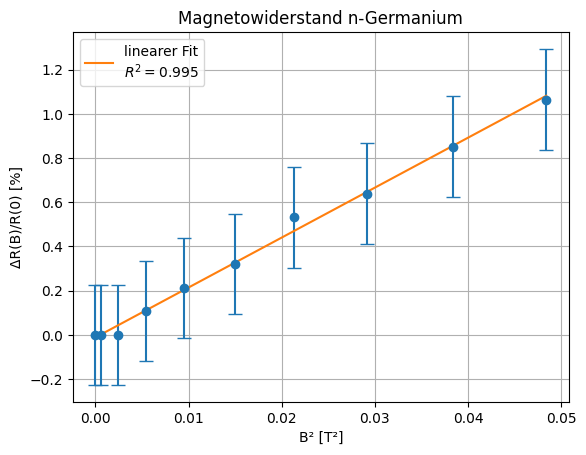

0.939+/-0.006

R(0) = 37.56+/-6.01 Ω
σ = 0.5325+/-0.0853 1/(Ω*cm)
µ_n = -0.38+/-0.08 m²/Vs = -3785.8501+/-769.6129 cm²/Vs
R^2 = 0.9953


In [41]:
#Aufgabe 5 Magneto widerstand n-Germanium
U_values = np.array([0.939, 0.939, 0.939, 0.940, 0.941, 0.942, 0.944, 0.945, 0.947, 0.949])
U_uncertainty = U_values*0.005+0.001
Probenstrom = ufloat(0.025, 0.004)

U_B = unp.uarray(U_values, U_uncertainty)

R = U_B / Probenstrom
R0 = copy.deepcopy(R[0])
#R0 = R[0]                  #der widerstand bei 0


Differenz = (R - R0) / R0  #ΔR(B)/R(0)

Differenz_wert =  unp.nominal_values(Differenz)
Differenz_u = unp.std_devs(Differenz)

#Plotten B^2 als abszisse (x-achse) weil laut theorethischen modellen ΔR(B)/R(0) direkt proportional zu B^2 sein sollte (also eine gerade).

# Fit UH(B))
Steigung, intercept, r_value, _, stderr = linregress(Magnetfeld**2, Differenz_wert)
Gerade_unsich = ufloat(Steigung, stderr)

plt.figure()
plt.errorbar(Magnetfeld**2, Differenz_wert*100, yerr=Differenz_u, capsize=5, fmt='o')

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value**2:.3f}$'

plt.plot(Magnetfeld**2, (Steigung*Magnetfeld**2+intercept)*100, label=label)
plt.xlabel("B² [T²]")
plt.ylabel("ΔR(B)/R(0) [%]")
plt.title("Magnetowiderstand n-Germanium")
plt.legend()
plt.grid()
plt.show()

# Leitfähigkeit und Beweglichkeit
#R0_u = ufloat(R0, 0)
sigma = l / (R0 * A)
mu_n = sigma / (n * e)

#print()
#print(f"Differenz = {Differenz}")
print(U_B[0])
print()
print(f"R(0) = {R0:.2f} Ω")
print(f"σ = {sigma*1e-2:.4f} 1/(Ω*cm)")
print(f"µ_n = {mu_n:.2f} m²/Vs = {mu_n * 1e4:.4f} cm²/Vs")
print(f"R^2 = {r_value**2:.4f}")


# Die Unsicherheiten vom hersteller bezüglich Strom sind sehr hoch, da das Gerät nur eine Auflösung von 1 mA hat und der Probestrom 25mA beträgt

R_H = -0.0090+/-0.0014 [m^3/As] = -8994.3434+/-1443.4086 [cm^3/As]
p = (-6.940+/-1.114)e+20 [1/m³]

R_H umgepolt = 0.0088+/-0.0014 [m^3/As] = 8757.6800+/-1409.9410 [cm^3/As]
p umgepolt = (7.128+/-1.148)e+20 [1/m³]


R^2 = 0.9988


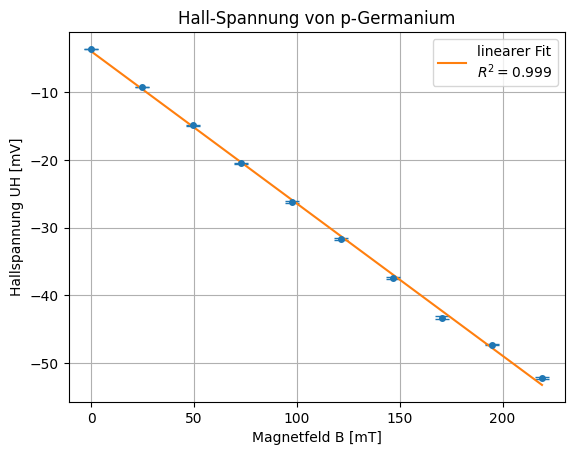

R^2 = 0.9975


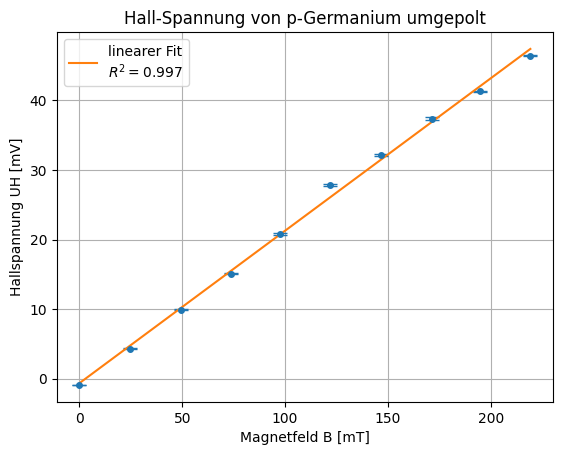

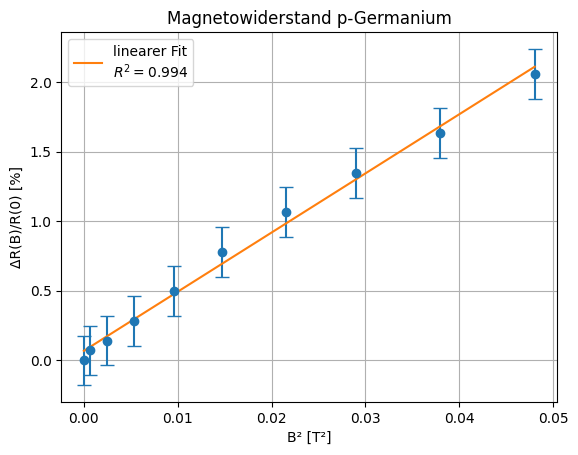

1.410+/-0.008

R(0) = 56.4000+/-7.0573 Ω
σ = 35.4610+/-4.4372 S/m
µ_p = 0.3106+/-0.0633 m²/Vs = 3105.5603+/-633.2368 cm²/Vs
R² = 0.9940


In [42]:
#Aufgabe 6, nochmal 2,3,4,5 nur mit p-Germanium

I_probe = ufloat(0.025,0.004)                                                             # Probenstrom bleibt absofort gleich (+/-0.003125 unsicherheit aufrunden)
I_B = np.array([0.0, 0.506, 1.014, 1.501, 2.009, 2.493, 3.015, 3.498, 3.998, 4.5])               # Magnetfeldstrom wird erhöht
I_B_umgepolt = np.array([0.0, 0.506, 1.016, 1.511, 2.001, 2.5, 3.015, 3.516, 4.002, 4.502]) 

Magnetfeld = 48.7e-3 * I_B                                                  # gegebene Eichung vom Feld
Magnetfeld_umgepolt = 48.7e-3 * I_B_umgepolt                               #bin mir beim umpolen nicht sicher, hab jetzt einfach ein minus davor gemacht

Hall_Spannung = np.array([-3.61, -9.22, -14.87, -20.51, -26.20, -31.70, -37.41, -43.3, -47.3, -52.2])*1e-3 #in volt wegen 10e-3
Hallspannung_unsicherheit = abs((Hall_Spannung*1e3))*0.005+0.0001

Hallspannung_unsicherheit[0] = abs(UH_B_umgepolt_wert[0]) * 0.005 + 0.001
Hallspannung_unsicherheit[-2] = abs(UH_B_umgepolt_wert[-2]) * 0.005 + 0.1                  #andere bereiche für unsicherheit
Hallspannung_unsicherheit[-1] = abs(UH_B_umgepolt_wert[-1]) * 0.005 + 0.1

UH_B = unp.uarray(Hall_Spannung,Hallspannung_unsicherheit)
yerr_UH_B = unp.std_devs(UH_B)

UH_B_umgepolt_wert = np.array([-0.88, 4.35, 9.95, 15.09, 20.77, 27.85, 32.19, 37.37, 41.3, 46.4])*1e-3   
UH_B_umgepolt_unsicherheit = abs(UH_B_umgepolt_wert*1e3)*0.005+0.0001

UH_B_umgepolt_unsicherheit[0] = abs(UH_B_umgepolt_wert[0]) * 0.005 + 0.001
UH_B_umgepolt_unsicherheit[-2] = abs(UH_B_umgepolt_wert[-2]) * 0.005 + 0.1                  #andere bereiche für unsicherheit
UH_B_umgepolt_unsicherheit[-1] = abs(UH_B_umgepolt_wert[-1]) * 0.005 + 0.1

UH_B_umgepolt = unp.uarray(UH_B_umgepolt_wert,UH_B_umgepolt_unsicherheit)
yerr_UH_B_umgepolt = unp.std_devs(UH_B_umgepolt)

U_B = np.array([1.402, 1.405, 1.407, 1.409, 1.413, 1.418, 1.422, 1.428, 1.433, 1.438]) # in volt
U_B_umgepolt = np.array([1.410, 1.411, 1.412, 1.414, 1.417, 1.421, 1.425, 1.429, 1.433, 1.439])

# Fit UH(B))
Gerade, intercept, r_value, _, stderr = linregress(Magnetfeld, Hall_Spannung)
Gerade_unsich = ufloat(Gerade, stderr)
RH = Gerade_unsich * d / I_probe
n = 1 / (e * RH)

# Fit UH(B)) umgepolt (hier werden RH und n nicht berrechnet)
Gerade2, intercept2, r_value2, _, stderr2 = linregress(Magnetfeld_umgepolt, UH_B_umgepolt_wert)
Gerade_unsich2 = ufloat(Gerade2, stderr2)
RH_2 = Gerade_unsich2 * d / I_probe
n_2 = 1 / (e * RH_2)


print(f"R_H = {RH:.4f} [m^3/As] = {RH*1e6:.4f} [cm^3/As]")
print(f"p = {n:.3e} [1/m³]")
print()
print(f"R_H umgepolt = {RH_2:.4f} [m^3/As] = {RH_2*1e6:.4f} [cm^3/As]")
print(f"p umgepolt = {n_2:.3e} [1/m³]")
print()
print()

# Plot
print(f"R^2 = {r_value**2:.4f}")
plt.figure()
plt.errorbar(Magnetfeld * 1e3, Hall_Spannung * 1e3, yerr = yerr_UH_B,  capsize=5, fmt='o', markersize=4)

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value**2:.3f}$'

plt.plot(Magnetfeld * 1e3, Gerade * Magnetfeld * 1e3 + intercept * 1e3, label=label)

plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung von p-Germanium")
plt.legend()
plt.grid()
plt.show()

print(f"R^2 = {r_value2**2:.4f}")
plt.figure()
plt.errorbar(Magnetfeld_umgepolt * 1e3, UH_B_umgepolt_wert * 1e3, yerr = yerr_UH_B_umgepolt, capsize=5, fmt='o', markersize=4)

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value2**2:.3f}$'

plt.plot(Magnetfeld_umgepolt * 1e3, Gerade2 * Magnetfeld_umgepolt * 1e3 + intercept2 * 1e3, label=label)


plt.xlabel("Magnetfeld B [mT]")
plt.ylabel("Hallspannung UH [mV]")
plt.title("Hall-Spannung von p-Germanium umgepolt")
plt.legend()
plt.grid()
plt.show()


#Magnetowiderstand p-Germanium 

U_values = np.array([1.410, 1.411, 1.412, 1.414, 1.417, 1.421, 1.425, 1.429, 1.433, 1.439])
U_uncertainty = U_values*0.005+0.001
Probenstrom = ufloat(0.025, 0.003125)

U_B = unp.uarray(U_values, U_uncertainty)

R = U_B / Probenstrom
R0 = copy.deepcopy(R[0])
#R0 = R[0]                  #der widerstand bei 0


Differenz = (R - R0) / R0  #ΔR(B)/R(0)

Differenz_wert =  unp.nominal_values(Differenz)
Differenz_u = unp.std_devs(Differenz)


#Plotten B^2 als abszisse (x-achse) weil laut theorethischen modellen ΔR(B)/R(0) direkt proportional zu B^2 sein sollte (also eine gerade).

# Fit UH(B))
Steigung, intercept, r_value3, _, stderr = linregress(Magnetfeld**2, Differenz_wert)
Gerade_unsich = ufloat(Steigung, stderr)

plt.figure()
plt.errorbar(Magnetfeld**2, Differenz_wert*100, yerr=Differenz_u,  capsize=5, fmt='o')

label = r'linearer Fit' + '\n' + rf'$R^2 = {r_value3**2:.3f}$'

plt.plot(Magnetfeld**2, (Steigung*Magnetfeld**2+intercept)*100, label=label)
plt.xlabel("B² [T²]")
plt.ylabel("ΔR(B)/R(0) [%]")
plt.title("Magnetowiderstand p-Germanium")
plt.grid()
plt.legend()
plt.show()

# Leitfähigkeit und Beweglichkeit
sigma = l / (R0 * A)
mu_n = sigma / (n_2 * e)

print(U_B[0])
print()
print(f"R(0) = {R0:.4f} Ω")
print(f"σ = {sigma:.4f} S/m")
print(f"µ_p = {mu_n:.4f} m²/Vs = {mu_n * 1e4:.4f} cm²/Vs")
print(f"R² = {r_value3**2:.4f}")

In [ ]:
ufloat
